## Chapter 5
# Time Domain Representations

## Transient Response, Steady State, and Decay

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
%matplotlib inline

def plot_filter_io_with_transients(Nx, Nh, A, B):
    n = np.arange(Nx)
    x = np.sin(n * 2 * np.pi * 7 / Nx) # input sinusoid - zero-pad it:
    zp = np.zeros(Nx // 2)
    xzp = np.hstack([zp, x, zp])
    y = lfilter(B, A, xzp)
    
    plt.figure(figsize=(10,8))
    plt.subplot(211)
    plt.plot(x)
    plt.title('Input Sinewave')
    plt.ylabel('Amplitude')
    plt.xlabel('Time (samples)')
    
    plt.subplot(212)
    plt.plot(y)
    plt.title('Filter Output')
    plt.ylabel('Amplitude')
    plt.xlabel('Time (samples)')
    plt.text(680, 30, 'transient ends\nsteady-state begins')
    plt.axvline(x=zp.size + Nh - 1, linestyle='--', c='k')
    plt.text(1580, 30, 'steady-state ends\ndecay transient begins')
    plt.axvline(x=zp.size + x.size, linestyle='--', c='k')
    plt.tight_layout()

### FIR Example

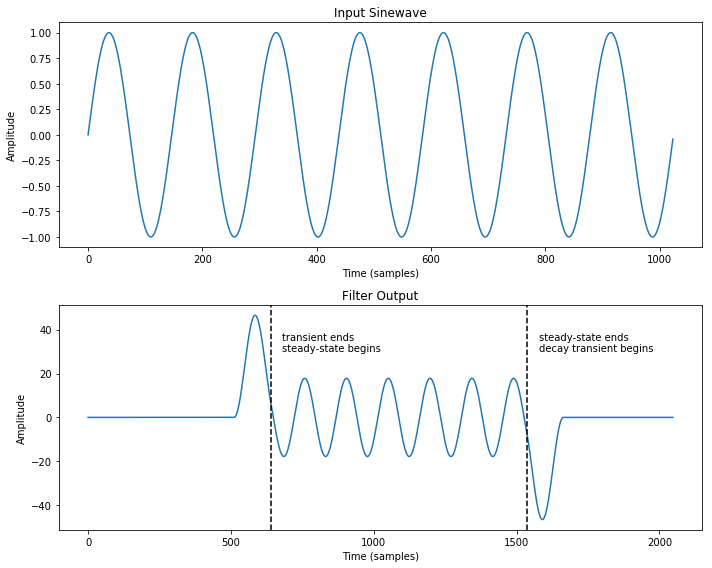

In [2]:
Nx = 1024 # input signal length (nonzero portion)
Nh = 128 # FIR filter length
A = 1; B = np.ones(Nh) # FIR "running sum" filter
plot_filter_io_with_transients(Nx, Nh, A, B)

_Fig. 5.7 on p114_

### IIR Example

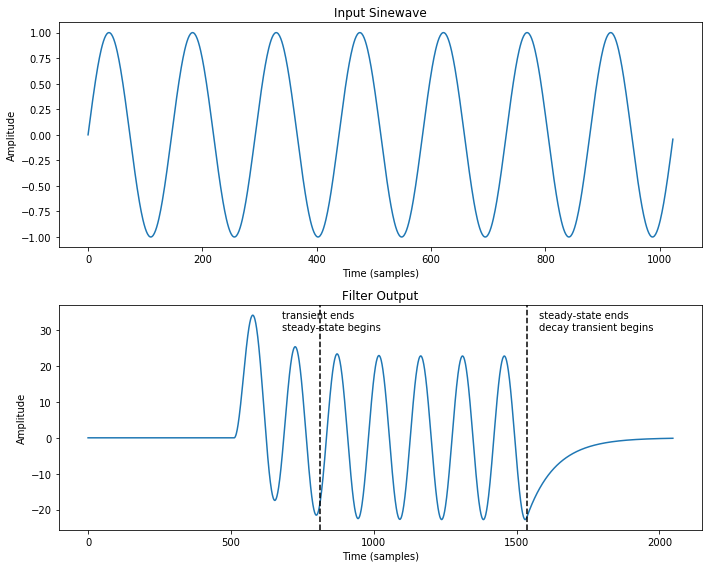

In [3]:
Nx = 1024 # input signal length (nonzero portion)
Nh = 300 # APPROXIMATE filter length (visually in plot)
B = [1]; A = [1, -0.99] # One-pole recursive example
plot_filter_io_with_transients(Nx, Nh, A, B)

_Fig. 5.8 on p117_

## Time-Domain Representation Problems

**1. From the definition of order given in the discussion after Eq. (5.1), determine the order of the following filter:**

$y(n) = x(n-1)+x(n-2)+y(n-1)$

Here, $M=2$ (notice each feedforward component is delayed), and $N=1$ (one feedback component). The order of the filter is the larger of $M$ and $N$, so the order of this filter is $2$.

**2. What is the order of the filter below?**

$y(n) = x(n) + x(n-1) + y(n-1)$

Here, $M=1$ and $N=1$, so this is an order $1$ filter.

**3. State a difference equation for the tremolo filter using a sinusoidally varying gain, maximum "depth", and a "rate" of 6 pulsations per second.**

The tremolo filter is defined as $y(n) \triangleq g(n)x(n)$, where $g(n)$ is an offset sinusoid. Here,

$g(n) = 1 + \sin(2\pi\cdot 6\cdot nT)$,

where $T = 1/f_s$ is the sample period in seconds:

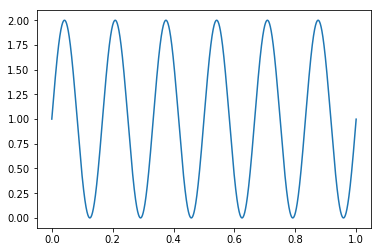

In [4]:
T = 1/44100
x = np.arange(0, 1, T)
_ = plt.plot(x, 1 + np.sin(2 * np.pi * 6 * x))

The difference equation for $\sin(n)$ is $y(n) = x(n) + \sin(2\pi \cdot 6 \cdot nT)x(n)$.

**4. Consider the difference equation for the recursive integrator,**

$y(n) = x(n) + y(n-1)$.

**Find its impulse response and write down its convolution representation. Why can you not program this form? How might the recursive form develop trouble even though you can program it?**

If we expand a few terms of this difference equation,

$\begin{align}
y(n) &= x(n) + y(n-1)\\
&= x(n) + x(n-1) + y(n - 2)\\
&= x(n) + x(n-1) + x(n-2) + y(n-3)\\
&= \cdots
\end{align}$

The impulse response of this filter is

$h(n) = u(n)\cdot 1^n = u(n)$,

where $u(n) \triangleq \begin{cases}\begin{array}{ll}1, &n \geq 0\\0, &n < 0.\end{array}\end{cases}$

The convolution representation of this filter is

$\begin{array}{ll}
y(n) &= \sum_\limits{i=0}^\limits{n}x(i)h(n-i)\\
&= \sum_\limits{i=0}^\limits{n}x(i) &\text{ since }h(i) = 1, i \geq 0\\
\end{array}$

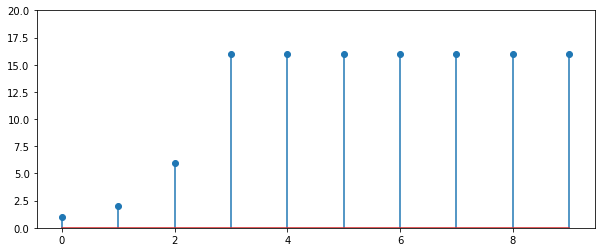

In [5]:
x = [1.0, 1.0, 4, 10] + [0] * 6
B = [1]; A = [1, -1]
plt.figure(figsize=(10, 4))
plt.stem(lfilter(B, A, x))
_ = plt.ylim(0, 20)

In [6]:
# manual recursive implementation
def recursive_filter(x, previous_y=0):
    return x + previous_y

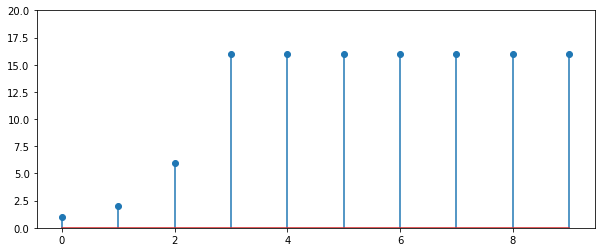

In [7]:
y = []
previous_y = 0
for x_i in x:
    y_i = recursive_filter(x_i, previous_y)
    y.append(y_i)
    previous_y = y_i

plt.figure(figsize=(10, 4))
plt.stem(y)
_ = plt.ylim(0, 20)

Clearly, we _can_ program this form with no issues. I think when this problem statement refers to developing "trouble", it is referring to the fact that this filter is not "stable". It does not ever decay, and so for audio applications this would result in ever increasing feedback since this is a simple "running sum".

**5. Show that there is no upper bound on the maximum gain of a stable filter. [Hint: Consider the first-order recursive filter $y(n) = x(n) + gy(n-1)$, where $\left|g\right| < 1$, and consider a dc input signal.]**

Consider (as hinted) the recursive filter $y(n) = x(n) + gy(n-1)$.

Choose any scalar $\alpha \in \mathbb{R}, \alpha > 0$.

Then we can find
* a scalar $g \in \mathbb{R}, \left|g\right| < 1$,
* a dc input signal $x(n) = \beta$,
* and an $M \in \mathbb{N}$ such that $y(n) \geq \alpha, \forall n \geq M$.

For example, if we choose $\alpha > 1$, $x(n) = \beta$ and $g = \frac{\alpha - 1}{\alpha}$, we have

$\begin{array}{ll}
y(n) &= \sum_\limits{n=0}^\limits{M}\left[\frac{\alpha - 1}{\alpha}\right]^n \cdot \beta\\
&= \beta\sum_\limits{n=0}^\limits{M}\left[\frac{\alpha - 1}{\alpha}\right]^n\\
\end{array}$

Since $\left|\frac{\alpha - 1}{\alpha}\right| < 1$, we can treat this as a geometric series and we cam choose an $M$ such that the summation is arbitrarily close to

$\frac{1}{1 - \frac{\alpha - 1}{\alpha}} = \frac{a}{a - (\alpha - 1)} = \alpha$.

That is,

$\lim_\limits{n \to \infty}y(n) = \frac{\beta}{1 - \frac{\alpha - 1}{\alpha}} = \beta\alpha$,


Thus, we can choose a dc signal with constant values $\beta > 1$ and reasonably large $M$. The larger the value of $\beta$, the fewer terms we need to reach a maximum greater than the given $\alpha$.

Here is a concrete example:

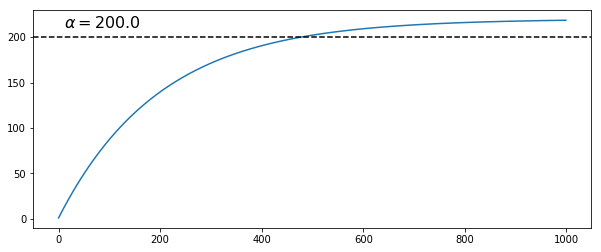

In [8]:
alpha = 200 # value to "beat"

# constant dc signal
# ("beta" above - theoretically can be anything greater than 1 if we choose M large enough)
dc = 1.1

g = (alpha - 1) / alpha # designed to make summation with "ones" dc signal approach alpha
M = 1000 # more than enough

B = [1]; A = [1, -g]
plt.figure(figsize=(10, 4))
y = lfilter(B, A, np.full(M, dc))
plt.plot(y)
plt.axhline(alpha, linestyle='--', c='k')
_ = plt.text(10, 210, '$\\alpha = %0.01f$' % alpha, size=16)

**6. Given the impulse response of an FIR digital filter $h(n), n = 0:L-1$, find the input signal $x(n)$ which satisfies $\left|x(n)\right| \leq 1$ and which results in the _maximum amplitude_ in the output signal. Find the time(s) that the maximum amplitude is achieved.**

Using the convolution representation of a linear, time-invariant, causal FIR filter,

$y(n) \triangleq \sum_\limits{i=0}^\limits{n}x(i)h(n-i)$,

we can see that the sum will be largest when $\left|x(n)\right| = 1$ and $\text{sign}(x) = \text{sign}(h)$. That is,

$x(n) \triangleq \begin{cases}\begin{array}{ll}1, &h(n) >= 0\\-1, &h(n) < 0.\end{array}\end{cases}$

With this definition of $x(\cdot)$, the output signal will achieve the maximum output signal when it has summed the most terms - when $n = L - 1$, and $t = (L - 1)T$ where $T$ is the sample period in seconds.

**7. Show that the _maximum amplitude_ of the output of a digital filter is given by the $L^1$ _norm_ of its impulse response, where the input signal is confined to the interval $\left|x(n)\right| \leq 1$, and the $L^1$ norm of a signal $x(n)$ is defined as the sum of the absolute values of its samples:**

$\|x\|_1 \triangleq \sum_\limits{n=-\infty}^\limits{\infty}\left|x(n)\right|$

Using the general convolution representation of a (time invariant) digital filter, the filter output is defined as

$\begin{array}{ll}
y(n) &\triangleq \sum_\limits{i=-\infty}^\limits{\infty}x(i)h(n-i)\\
&=\sum_\limits{i=-\infty}^\limits{\infty}h(i)x(n-i) &\text{ since convolution is commutative}
\end{array}$,

$\begin{array}{ll}
y(n) &= \sum_\limits{i=-\infty}^\limits{\infty}h(i)n(n-i)\\
&\leq \sum_\limits{i=-\infty}^\limits{\infty}h(i) &\text{ since }\left|x(n)\right| \leq 1\\
&\leq \sum_\limits{i=-\infty}^\limits{\infty}\left|h(i)\right|\\
&\triangleq \|h\|_1\\
QED
\end{array}$

(We can show the same thing without the time invariance assumption - we'd end up with $y(n) \leq \|h(n,\cdot)\|_1$, where $h(n,i)$ denotes the filter impulse response at time $n$ to an impulse occurring at time $i$. I chose to use the time-invariant definition since it lends itself to a more intuitive commutative switch.)
